# HW 2

## Problem 1 15 points

Consider proof-of-work via finding birthday collisions(see http://www.hashcash.org/papers/momentum.pdf). 

1.Write probability of a match and probability of matching fixed value for a set of N unique values as a function of the observation number  5 points

Probability of match:
$$
p(n,N) = \begin{cases} 1 - \prod\limits_{k = 1}^{n-1}(1 - \frac{k}{N}), n \leq N \\
1, n \geq N
\end{cases}
$$
Probability of matching fixed value:
$$
q(n,N) = 1 - (\frac{N-1}{N})^n
$$

2.Plot this functions for N = 10, 100, 1000, 10000 and explain the differences 5 points

In [2]:
import math 
import matplotlib.pyplot as plt

In [7]:
def q(n,N):
    return 1 - ((N - 1)/N)**n

#for p we use exponential approximation of p(n,N).
def p(n,N):
    return 1 - math.exp((-n*(n-1))/(2*N))


In [8]:
def plot_prob(n,N):
    x = [i for i in range(n)]
    q_list = []
    p_list = []
    for item in range(n):
        q_list.append(q(item,N))
        p_list.append(p(item,N))

    plt.figure(figsize = (15,5))
    plt.plot(x,q_list, label ='q(n), N = {}'.format(N))
    plt.ylabel('Probability')
    plt.xlabel('Number of observations')
    plt.plot(x,p_list, label ='p(n), N = {}'.format(N))
    plt.legend()
    return 0    

0

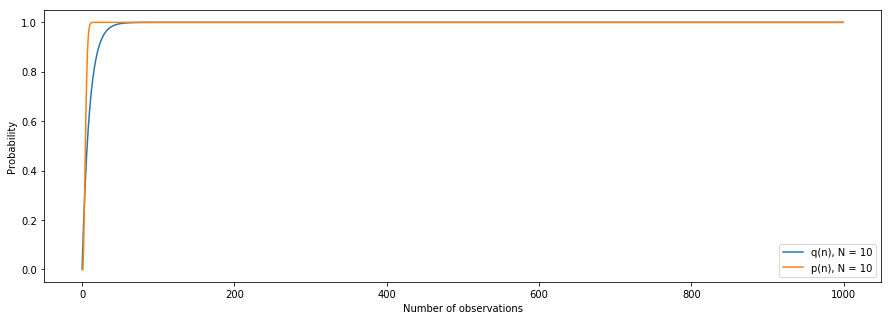

In [14]:
plot_prob(1000,10)

0

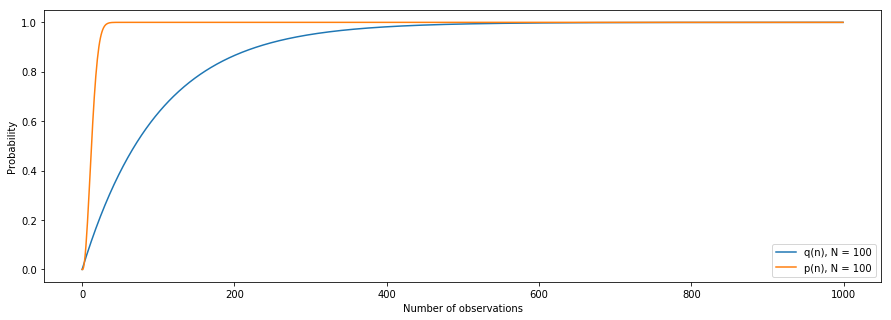

In [10]:
plot_prob(1000,100)

0

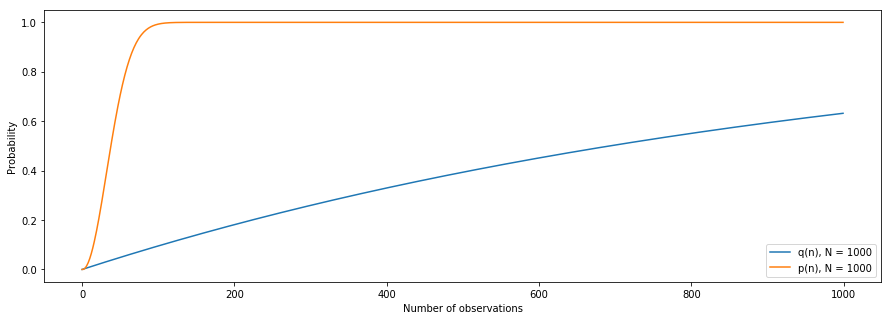

In [11]:
plot_prob(1000,1000)

0

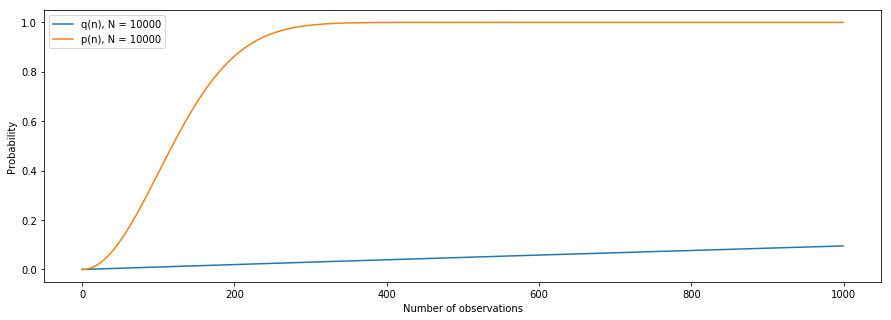

In [12]:
plot_prob(1000,10000)

From the graphs we can see, that for small $N$ the both probabilities are quite similar in behaviour, but increasing $N \rightarrow +\infty$ we can see, that difference comes larger and larger. This situation can be seen from asimptotic behaviour of both probabilities.

3.Propose the proof-of-work function with difficulty and CPU/memory parameters. 5 points

## Problem 2 (20 points)

Elliptic curves play an important role in modern cryptography. In this problem you will become familiar with basic operations over them

1.Implement python function that makes an addition operation of two elliptic curve points. The function must take a coefficient of the elliptic curve in Weierstrass Form ($y^2=x^3-px-q$), the base of the finite field over which we consider our curve and coordinates of points. Please note that there are four possible cases depending on points mutual agreement (here we also mean adding of two similar points) 4 points

In [49]:
def egcd(n1, n2):
    if n1 == 0:
        return (n2, 0, 1)
    else:
        g, y, x = egcd(n2 % n1, n1)
        return (g, x - (n2 // n1) * y, y)

def inv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('Inv does not exist!')
    else:
        return x % m

In [50]:
def summ(a,b,p,P,Q):
    #infinity, denoted in Vladimirov book by O is here denoted here by 0.
    if P == 0:
        return Q
    if Q ==0:
        return P
    x1, y1 = P
    x2, y2 = Q
    if x1%p == x2%p and y1%p == -y2%p:
        return 0
    
    if x1%p == x2%p and y1%p == y2%p:
        l = ((3*x1**2 + a)* inv((2*y1)%p,p))%p
    else:
        l = ((y2 - y1)*inv((x2-x1)%p,p))%p
    
    x3 = (l**2 - x1 - x2)%p
    y3 = (-y1 + l*(x1 - x3))%p
    return [x3,y3]
      

In [51]:
summ(5,6,17,0, [-8,7])

[-8, 7]

2.Implement python function that makes a multiplication of elliptic curve point by a natural number. The function must take a coefficient of the elliptic curve in Weierstrass Form ($y^2=x^3-px-q$), the base of the finite field over which we consider our curve, coordinate of point and integer number. Please note that $aA$ is equal to $A+....+A$ a times 4 points

In [52]:
def mult(a,b,p,P,alpha):
    if alpha <= 0:
        raise Exception('Alpha must be integer !')
    if alpha%2 == 0: #made to reduce amount of calculations
        A = P
        for i in range(int(alpha/2)-1):
            A = summ(a,b,p,A,P)
        A = summ(a,b,p,A,A)
    else:
        A = P
        for i in range(alpha-1):
            A = summ(a,b,p,A,P)
    return A
        

3.Implement python function that produces the common secret key in elliptic curve version of the Diffie-Hellman protocol. The function must take a coefficient of the elliptic curve in Weierstrass Form ($y^2=x^3-px-q$), the base of the finite field over which we consider our curve, generator point of the group of points in this curve and Bob's and Alices' secret keys (natural numbers). Please note that in this problem we change $g^amod p$ operation by $aG$, there $a$ is secret key and $G$ is generator point. 4 points

In [62]:
def secret_key(a,b,p,g,k_a,k_b):
    a_open = mult(a,b,p,g,k_a)
    b_open = mult(a,b,p,g,k_b)
    a_secret = mult(a,b,p,a_open,k_b)
    b_secret = mult(a,b,p,b_open,k_a)
    if a_secret == b_secret:
        print('Secret key = ', a_secret)
        return a_secret

    

4.For a given point of elliptic curve in Wierstrass form ($y^2=x^3-px-q$) write a python function that make a list of all point in group generated by this point. 4 points

In [63]:
def list_of_points(a,b,p,P):
    lst = []
    for i in range(1,p):
        itr = mult(a,b,p,P,i)
        if itr == 0:
            lst.append(itr)
            print('Group rank = ', i)
            return lst
        lst.append(itr)
    print('Group rank = ', p)
    return lst

5.Test you functions over elliptic curve $y^2=x^3-3x-6$ over $\mathbf{F}_{17}$ with generator point $G=(15;3)$, Bob's secret key is 3 and Alice secret key is 2. In other words give the full list of points of this elliptic curve and provide a common secret key in the Diffie-Hellman protocol. 4 points

In [64]:
print(list_of_points(-3,-6,17,[15,3]))
print(secret_key(-3,-6,17,[15,3],2,3))

Group rank =  7
[[15, 3], [2, 8], [9, 13], [9, 4], [2, 9], [15, 14], 0]
Secret key =  [15, 14]
[15, 14]


## Problem 3 15 points

Consider the following employee relation, and the way salary should be partitioned.



<img src="pic1.png">

Consider the following query:

SELECT did, SUM(salary)

FROM EMPLOYEE

GROUP BY did.


Formulate in relational algebra form (5 points)

$_{did}F_{sum(salary)}$(EMPLOYEE)

Formulate the SQL query to show all employee receiving salary in given range (5 points)

This SQL query is made for range [45000,60000], if we want input variables, denoted as [min,max], we should replace numbers with :min and :max respectively.

SELECT * 

FROM work

WHERE salary >= 45000 

AND salary <= 60000

Formulate the SQL query to show city with maximal salary (5 points)

SELECT city

FROM EMPLOYEE

WHERE salary = (SELECT MAX(salary) FROM EMPLOYEE)